The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


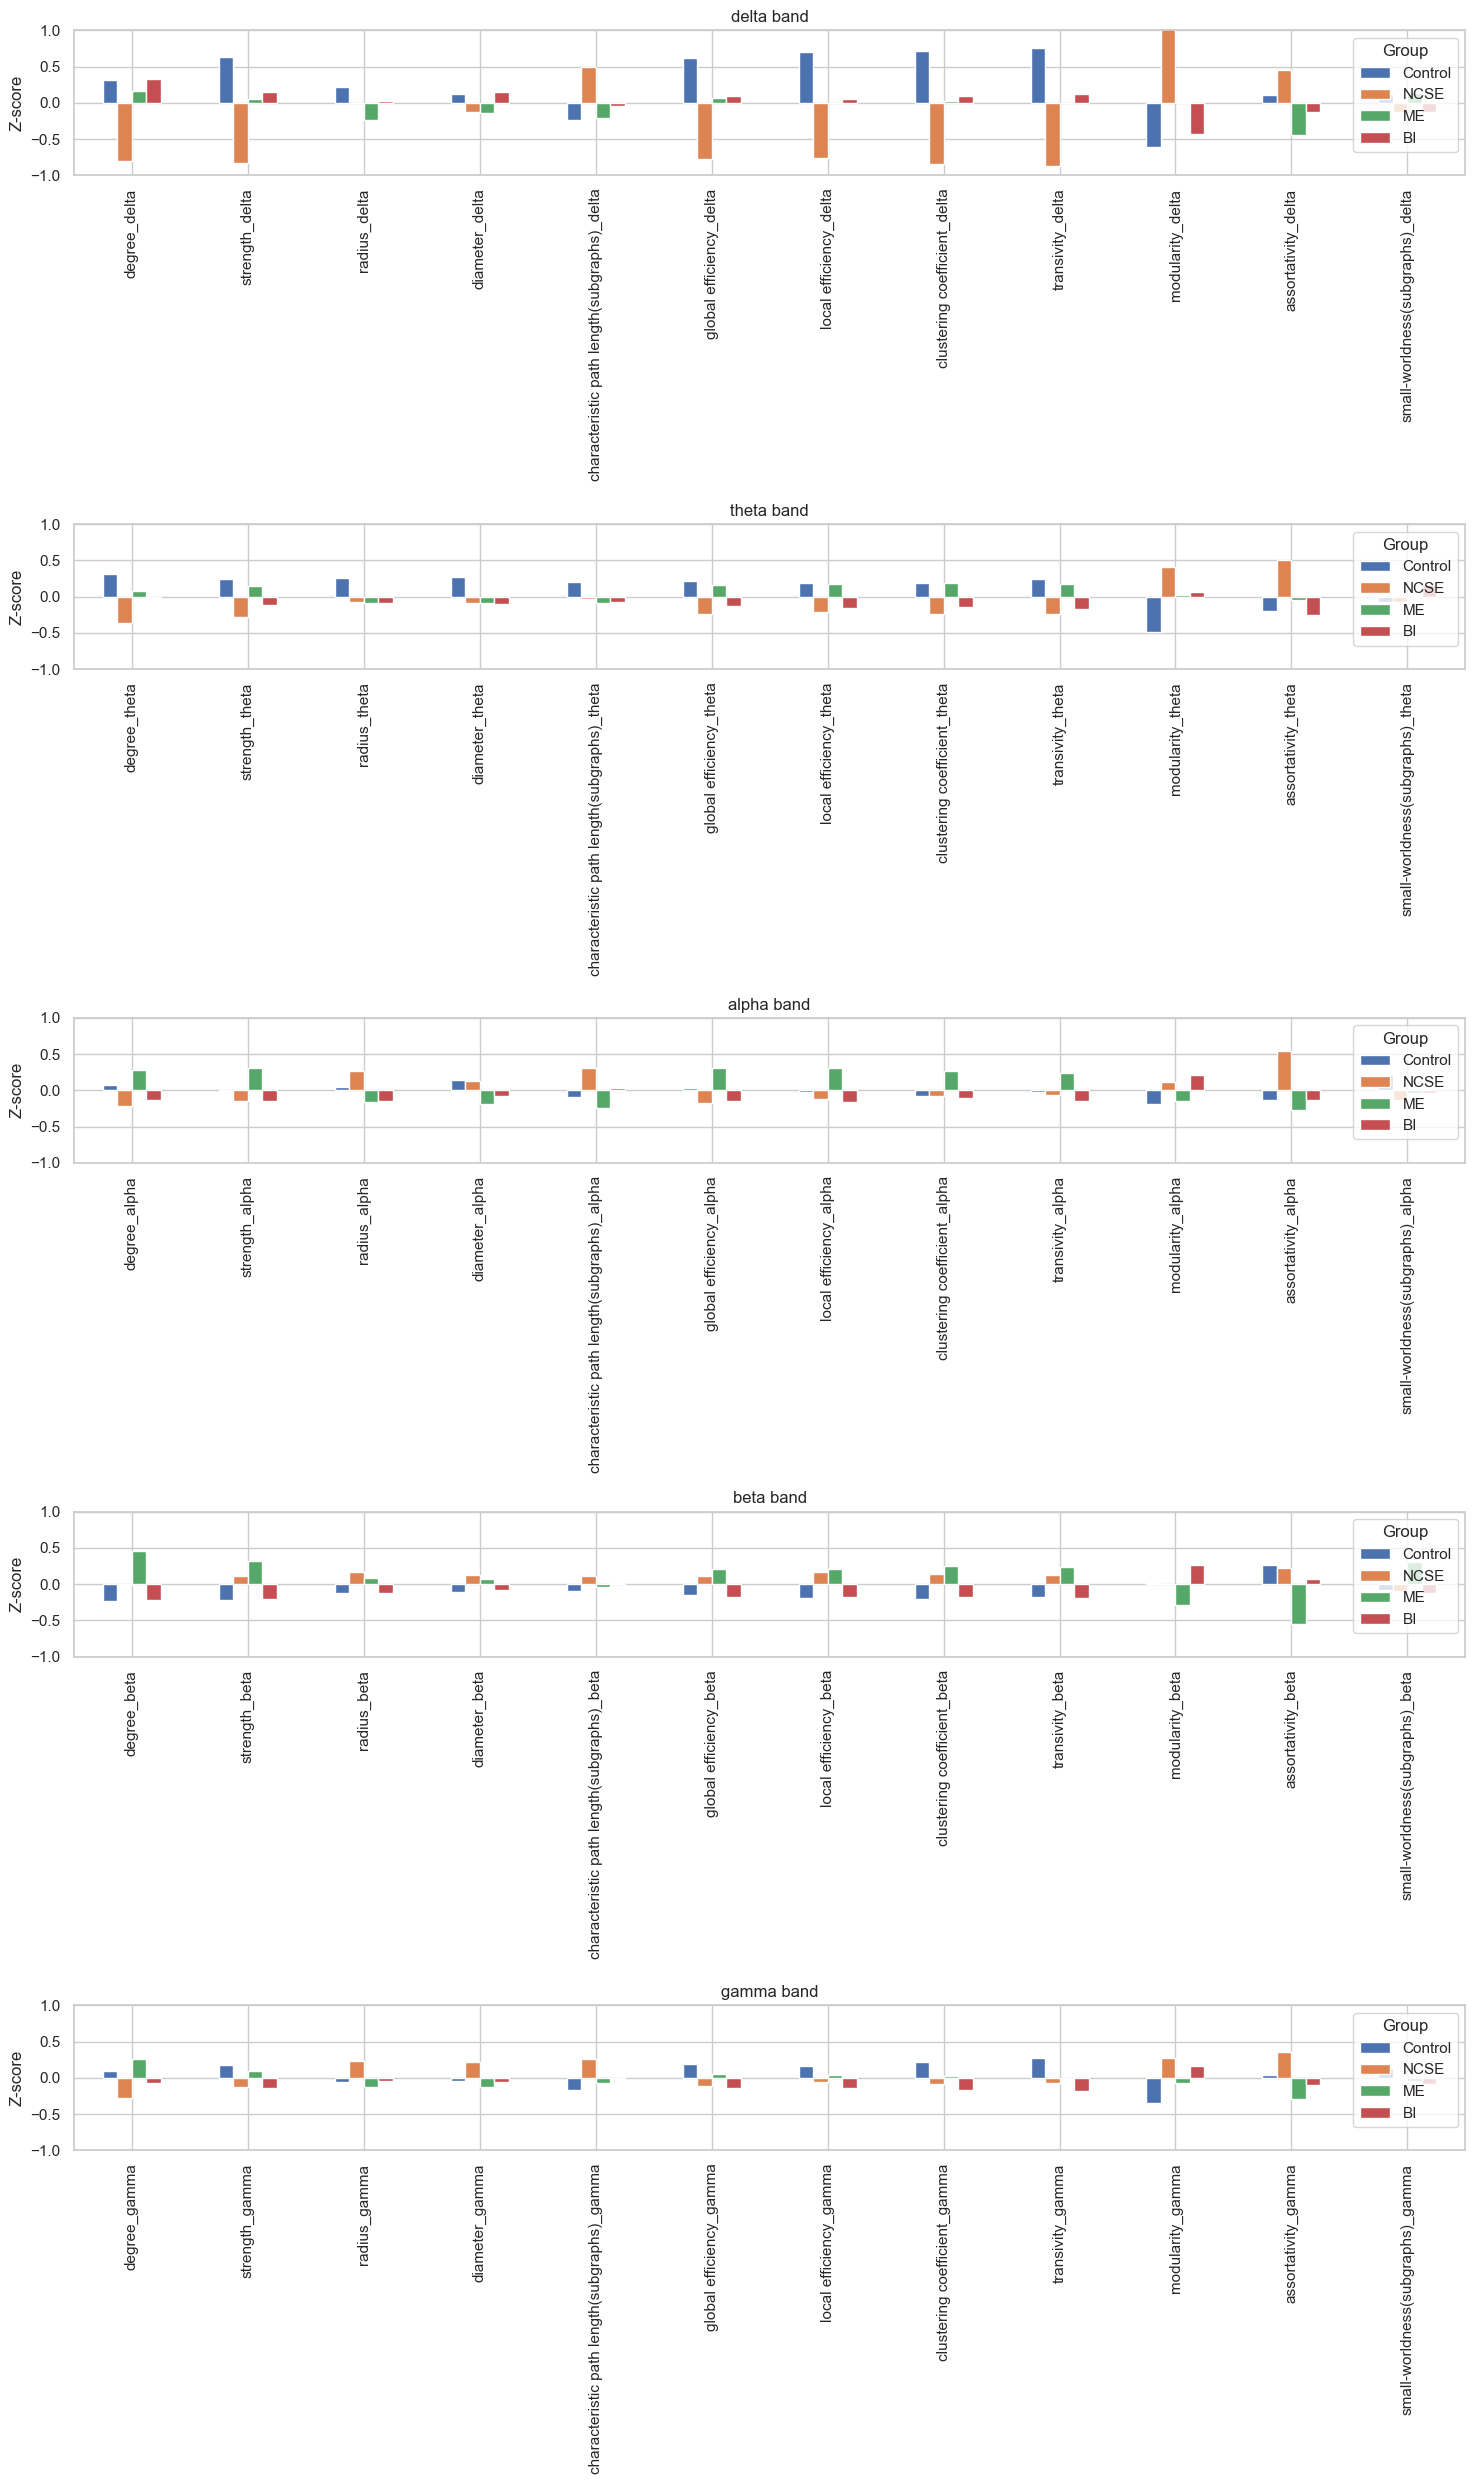

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Read the data
df = pd.read_csv('C:/Users/kyt34/data/GRAPH_150.csv')

# Set up the plotting environment
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

# Desired order for the bands and groups
band_order = ["delta", "theta", "alpha", "beta", "gamma"]
group_order = ['Control', 'NCSE', 'ME', 'BI']

# Iterate through the ordered bands and plot
for idx, band in enumerate(band_order):
    # Filter out the columns related to the current band
    band_cols = [col for col in df.columns if band in col]
    band_df = df[band_cols]
    
    # Calculate the Z-scores for each column
    zscore_df = band_df.apply(zscore)
    
    # Calculate the mean of Z-scores for each group and reorder them
    mean_zscores = zscore_df.groupby(df['group']).mean().reindex(group_order)
    
    # Plot
    mean_zscores.T.plot(kind='bar', ax=axes[idx], ylim=(-1, 1), title=f'{band} band')
    axes[idx].set_ylabel('Z-score')
    axes[idx].legend(title='Group')

# Adjust the layout and save as EPS
plt.tight_layout()
plt.savefig("zscore_analysis.eps", format="eps")
